In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from joblib import dump,load
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
datapath = '/home/shrawan/Desktop/w/Finalyear/NGuard/src/sniffed/2022-05-08/'
binary_clf_path = '/home/shrawan/Desktop/w/Finalyear/NGuard/src/brain/models/binary/'
multi_clf_path = '/home/shrawan/Desktop/w/Finalyear/NGuard/src/brain/models/multiclass/'

In [3]:
#for binary classification
bpca = load(f'{binary_clf_path}bpca.joblib')
bscaler = load(f'{binary_clf_path}bscaler.joblib')
bclf = load(f'{binary_clf_path}binary.joblib')

In [4]:
df = pd.DataFrame()

In [6]:
test_file = f'/home/shrawan/Desktop/w/Finalyear/NGuard/src/sniffed/2022-05-08_Flow1.csv'
test_dataframe = pd.read_csv(test_file)



# test_dataframe.drop_duplicates(subset=['Flow ID'],inplace=True)
# df = test_dataframe[['Src IP', 'Src Port', 'Dst IP','Dst Port','Protocol',
#                     'Timestamp']].copy()
# test_dataframe.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Dst Port','Protocol',
#                     'Timestamp','Flow Byts/s', 'Flow Pkts/s','Label'],inplace=True,axis=1)

In [7]:
# first classify with binary class for anomaly detection

print(test_dataframe['label'].value_counts())
# test_dataframe.drop(test_dataframe.loc[test_dataframe['label']=='Benign'].index,inplace=True)
# print(test_dataframe['label'].value_counts())
test_dataframe.drop(['dst_port','protocol','timestamp','flow_byts_s', 'flow_pkts_s'],inplace=True,axis=1)
test_dataframe.columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min','label']
dc = dict()
dtypes = [
    'int64','int64','int64','int64','int64','int64','int64',
    'float64','float64', 
    'int64','int64',
    'float64','float64','float64','float64',
    'int64','int64','int64',
    'float64','float64',
    'int64','int64','int64',
    'float64','float64',
    'int64','int64','int64','int64','int64','int64','int64','int64',
    'float64','float64',
    'int64','int64',
    'float64','float64','float64',
    'int64','int64','int64','int64','int64','int64','int64','int64','int64',
    'float64','float64','float64',
    'int64','int64','int64','int64','int64','int64','int64','int64','int64','int64','int64','int64','int64','int64',
    'float64','float64',
    'int64','int64',
    'float64','float64',
    'int64','int64'
]
columns = test_dataframe.columns
for c,d in zip(columns,dtypes):
    dc[c]=d
    
    
    
    
    

    


Benign    762384
Bot       286191
Name: label, dtype: int64


In [8]:
X = test_dataframe.drop(['label'],axis=1)
test_dataframe[test_dataframe['label'] != 'Benign']= 0
test_dataframe[test_dataframe['label'] != 0]= 1
y = test_dataframe['label'].copy()

In [9]:
def test_performance(y_actual,y_predicted):
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
    from sklearn.metrics import precision_recall_curve, precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import roc_curve, auc, classification_report



    score = f1_score(y_actual,y_predicted,average='micro')
    print('F1 Score: %.3f' % score)

    cmatrix = confusion_matrix(y_actual,y_predicted,labels=[1,0])
    cm_obj = ConfusionMatrixDisplay(cmatrix,display_labels=[1,0])
    cm_obj.plot()
    cm_obj.ax_.set(
                    title='Sklearn Confusion Matrix for Benign and Intrusions', 
                    xlabel='Predicted Class', 
                    ylabel='True Class')



    print('Precison',precision_score(y_actual, y_predicted, average='macro'))
    print('Recall',recall_score(y_actual, y_predicted, average='macro'))
    print('Misclassification',(cmatrix[0][1]+cmatrix[1][0])/(cmatrix[0][0]+cmatrix[0][1]+cmatrix[1][0]+cmatrix[1][1]))
    print('\n')
    print('Accuracy',(cmatrix[0][0]+cmatrix[1][1])/(cmatrix[0][0]+cmatrix[0][1]+cmatrix[1][0]+cmatrix[1][1]))
    print('FPR(A classicifed as B)',(cmatrix[1][0])/(cmatrix[1][0]+cmatrix[1][1]))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_actual, y_predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc auc',roc_auc)
    print("Classification report:" "\n",classification_report(y_actual,y_predicted))

predictions= bclf.predict(bpca.transform(bscaler.transform(X.astype(dc).values)))

test_performance(y_actual=y.astype('int'),y_predicted=predictions)



In [10]:
#for multi binary classfication
dos = load(f'{multi_clf_path}withpca/dos')
ddos = load(f'{multi_clf_path}withpca/ddos')
portscan = load(f'{multi_clf_path}withpca/portscan')



dosscl = load(f'{multi_clf_path}withpca/dosscaler')
ddosscl = load(f'{multi_clf_path}withpca/ddosscaler')
portscanscl = load(f'{multi_clf_path}withpca/portscanscaler')


dospca = load(f'{multi_clf_path}withpca/dospca')
ddospca = load(f'{multi_clf_path}withpca/ddospca')
portscanpca = load(f'{multi_clf_path}withpca/portscanpca')


clfs = [dos,ddos,portscan]
scls = [dosscl,ddosscl,portscanscl]
pcas = [dospca,ddospca,portscanpca]
attack_names = ['dos','ddos','portscan']

F1 Score: 0.699
Precison 0.3595880531286061
Recall 0.4806770603790216
Misclassification 0.3010313997568128


Accuracy 0.6989686002431872
FPR(A classicifed as B) 1.0
roc auc 0.4806770603790216
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    286191
           1       0.72      0.96      0.82    762384

    accuracy                           0.70   1048575
   macro avg       0.36      0.48      0.41   1048575
weighted avg       0.52      0.70      0.60   1048575

F1 Score: 0.727
Precison 0.3892106724633138
Recall 0.49981370948702547
Misclassification 0.2732327205970007


Accuracy 0.7267672794029993
FPR(A classicifed as B) 0.9999371049404069
roc auc 0.49981370948702547
Classification report:
               precision    recall  f1-score   support

           0       0.05      0.00      0.00    286191
           1       0.73      1.00      0.84    762384

    accuracy                           0.73   1048575
   mac

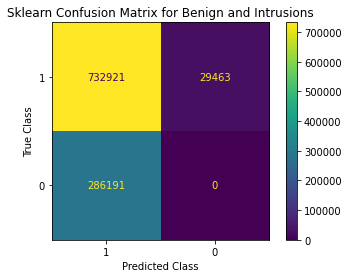

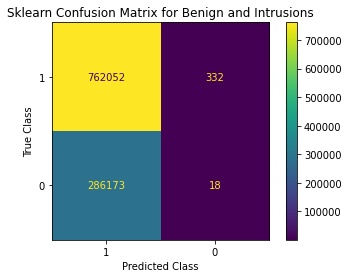

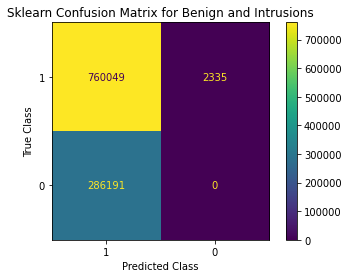

In [11]:
for c,s,p,name in zip(clfs,scls,pcas,attack_names):
    y_p = c.predict(p.transform(s.transform(X.astype(dc).values)))
    test_performance(y_actual=y.astype('int'),y_predicted=y_p)

    
    